In [310]:
import ipycytoscape

%load_ext autoreload
%autoreload 2

from kiara import Kiara
from rich.jupyter import print

from kiara.utils.jupyter import graph_to_image

kiara: Kiara = Kiara.instance()

# print('---')
workflow = kiara.create_workflow("onboard_network_graph")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing of step 'create_graph' failed: 'Field "source" does not exist in table schema'
Processing of step 'create_graph' failed: 'Field "target" does not exist in table schema'


Value-set: Inputs for pipeline 'onboard_network_graph_32'
                                                                                             
  name                type     desc                                       required   is set  
 ─────────────────────────────────────────────────────────────────────────────────────────── 
  edges_path          string   The path to a file or folder that          yes        yes     
                               contains tabular data.                                        
  nodes_path          string   The path to a file or folder that          yes        yes     
                               contains tabular data.                                        
  source_column       string   The name of the column that contains the   yes        yes     
                               edge source in edges table.                                   
  target_column       string   The name of the column that contains the   yes        yes     
                               edge target in the edges table.                               
  weight_column       string   The name of the column that contains the   yes        yes     
                               edge weight in edges table.                                   
  nodes_table_index   string   The name of the column that contains the   no         yes     
                               node index in the node attributes table.

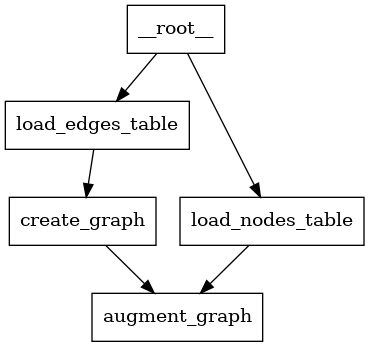

In [311]:
workflow.inputs.nodes_path = "/home/markus/projects/dharpa/notebooks/NetworkXAnalysis/JournalNodes1902.csv"
workflow.inputs.nodes_table_index = "Id"
workflow.inputs.edges_path = "/home/markus/projects/dharpa/notebooks/NetworkXAnalysis/JournalEdges1902.csv"
workflow.inputs.source_column = "Source"

workflow.inputs.target_column = "Target"
workflow.inputs.weight_column = "weight"

print(workflow.inputs)
graph_to_image(workflow.structure.execution_graph)

In [312]:
kiara.info(workflow.structure)

Pipeline structure: onboard_network_graph_32

Steps:

- processing stage: 1
                                                             
  step_id:      load_edges_table                             
 ─────────────────────────────────────────────────────────── 
  type          import_table                                 
  required      yes                                          
  is pipeline   no                                           
  inputs        path (string) ➜ PIPE_INPUT.edges_path        
  outputs       table (table) ➜ create_graph.edges_table     
                                                             
                                                                  
  step_id:      load_nodes_table                                  
 ──────────────────────────────────────────────────────────────── 
  type          import_table                                      
  required      yes                                               
  is pipeline   no                                                
  inputs        path (string) ➜ PIPE_INPUT.nodes_path             
  outputs       table (table) ➜ augment_graph.node_attributes     
                                                                  
- processing stage: 2
                                                                      
  step_id:      create_graph                                          
 ──────────────────────────────────────────────────────────────────── 
  type          create_directed_graph                                 
  required      yes                                                   
  is pipeline   no                                                    
  inputs        edges_table (table)    ➜ load_edges_table.table       
                source_column (string) ➜ PIPE_INPUT.source_column     
                target_column (string) ➜ PIPE_INPUT.target_column     
                weight_column (string) ➜ PIPE_INPUT.weight_column     
  outputs       graph (network_graph) ➜ augment_graph.graph           
                                                                      
- processing stage: 3
                                                                              
  step_id:      augment_graph                                                 
 ──────────────────────────────────────────────────────────────────────────── 
  type          augment_network_graph                                         
  required      yes                                                           
  is pipeline   no                                                            
  inputs        graph (network_graph)      ➜ create_graph.graph               
                node_attributes (table)    ➜ load_nodes_table.table           
                index_column_name (string) ➜ PIPE_INPUT.nodes_table_index     
  outputs       graph (network_graph) ➜ PIPE_OUTPUT.graph

In [313]:
print(workflow.get_current_state())

ValidationError: 4 validation errors for PipelineState
structure -> steps -> load_edges_table -> step
  descriptor '_id' for 'PipelineStep' objects doesn't apply to a 'PipelineStep' object (type=type_error)
structure -> steps -> load_nodes_table -> step
  descriptor '_id' for 'PipelineStep' objects doesn't apply to a 'PipelineStep' object (type=type_error)
structure -> steps -> create_graph -> step
  descriptor '_id' for 'PipelineStep' objects doesn't apply to a 'PipelineStep' object (type=type_error)
structure -> steps -> augment_graph -> step
  descriptor '_id' for 'PipelineStep' objects doesn't apply to a 'PipelineStep' object (type=type_error)

In [ ]:
# rich_print(workflow.outputs.data)
print(workflow.outputs.graph)
# print("---")
data = workflow.outputs.graph.get_value_data()

graph_to_image(data)